# Naive Bayes decision boundary
The Gaussian Naive Bayes decision boundary will generally be nonlinear if for each feature and each class, the variance of the Gaussian is allowed to vary. First, let's build a function to plot the discriminant functions $d_c(\mathbf{x})=P(\mathbf{x}|Y=c)P(c)$. Here $c$ is the class (0 or 1) and we assume that the priors are equal across the classes, or 0.5 each, so we can leave them out since they affect each discriminant equally.

For each example we'll show the discriminant function for class 0 and class 1 and the likelihood ratio.

In [1]:
# Comment out this like if not using a Mac (it makes the plots clearer)
%config InlineBackend.figure_format = 'retina'

In [2]:

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

'''Explore the variation in decision boundary in Naive Bayes assuming different 
means and variances for each marginal distribution'''

def plot_naive_bayes_example(X0,X1,mean,std):
    # Calculate the discriminant function for each class and the likelihood ratio
    D0 = norm.pdf(X0,loc=mean[0][0], scale=std[0][0]) * norm.pdf(X1,loc=mean[0][1], scale=std[0][1])
    D1 = norm.pdf(X0,loc=mean[1][0], scale=std[1][0]) * norm.pdf(X1,loc=mean[1][1], scale=std[1][1])
    confidencescore = np.log(D1 / D0)

    fig, axs = plt.subplots(2, 2, constrained_layout=True, figsize=(8,8))
    extent = [x0[0],x0[-1],x1[0],x1[-1]]
    axs[0, 0].imshow(D0, extent=extent, origin='lower')
    axs[0, 1].imshow(D1, extent=extent, origin='lower')
    axs[1, 0].imshow(confidencescore, extent=extent, origin='lower')
    axs[1, 0].contour(X0,X1,confidencescore, colors='white', linestyles='solid')
    axs[1, 1].axis('off')

    def set_plot_properties(ax, title):
        ax.set_title(title)
        ax.set_xlabel(r'$x_0$')
        ax.set_ylabel(r'$x_1$')
        ax.set_xticks(ticks=np.arange(x0[0],x0[-1]))
        ax.set_yticks(ticks=np.arange(x1[0],x1[-1]))
        ax.grid(visible=True)

    set_plot_properties(axs[0,0], r'$d_0(x_1,x_2)$')
    set_plot_properties(axs[0,1], r'$d_1(x_1,x_2)$')
    set_plot_properties(axs[1,0], 'Log-likelihood ratio')



## CASE 1: Constrained variances - same across classes

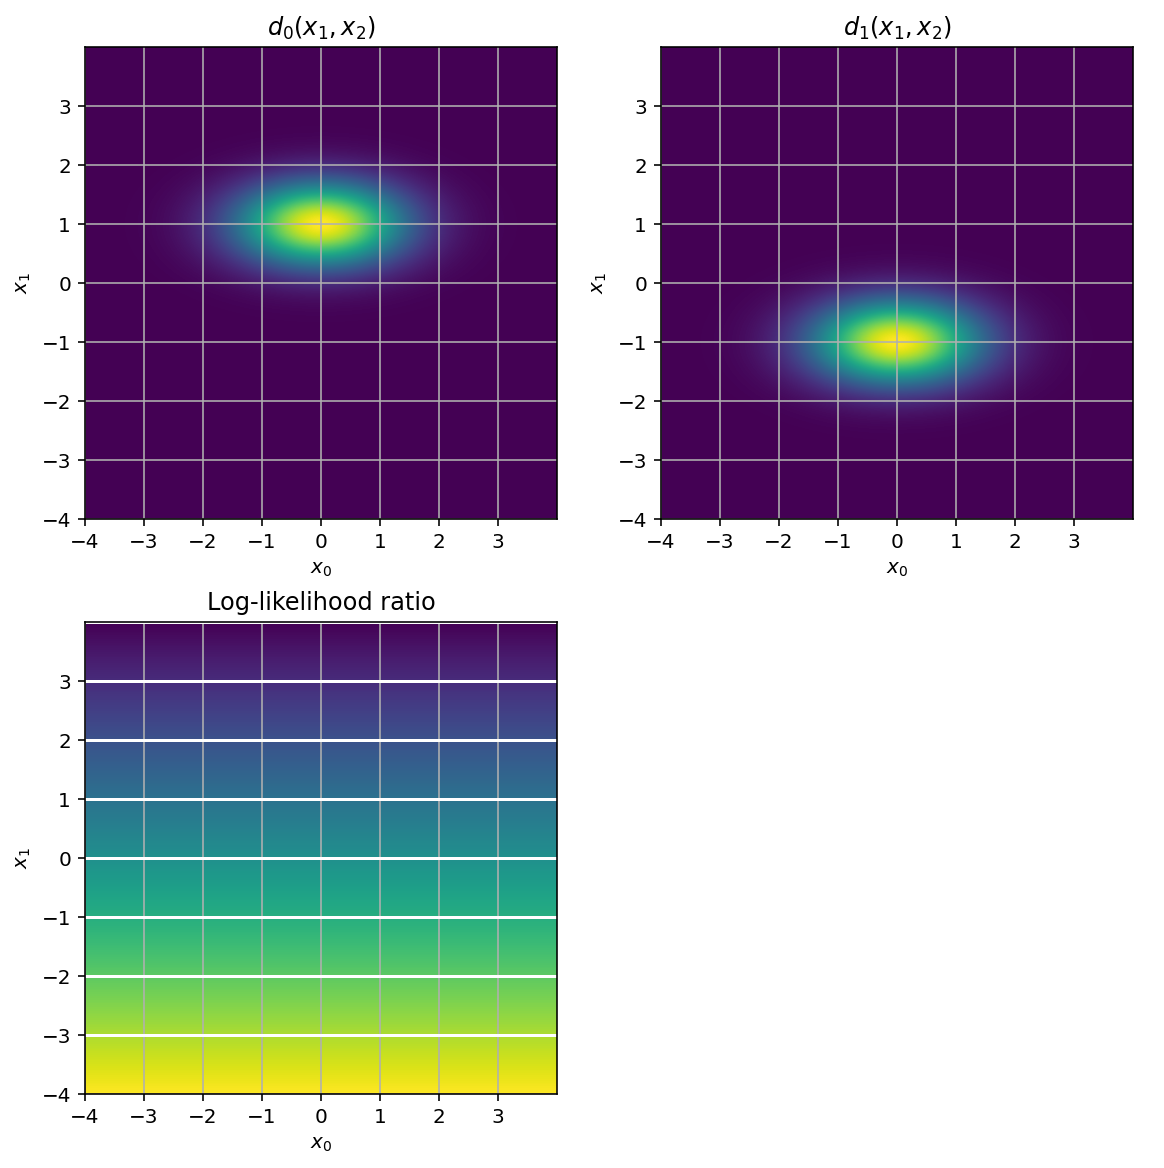

In [3]:

# State our means and standard deviations
mean = [[0,1], # Class 0 means for each feature
        [0,-1]] # Class 1 means for each feature
std = [[1, 0.5], # Class 0 stds for each feature
       [1, 0.5]] # Class 1 stds for each feature

# Create matrices to represent the feature space
x0 = np.linspace(-4,4,500)
x1 = np.linspace(-4,4,500)
X0, X1 = np.meshgrid(x0,x1)

plot_naive_bayes_example(X0,X1,mean,std)



## CASE 2: Unconstrained variances - different across classes

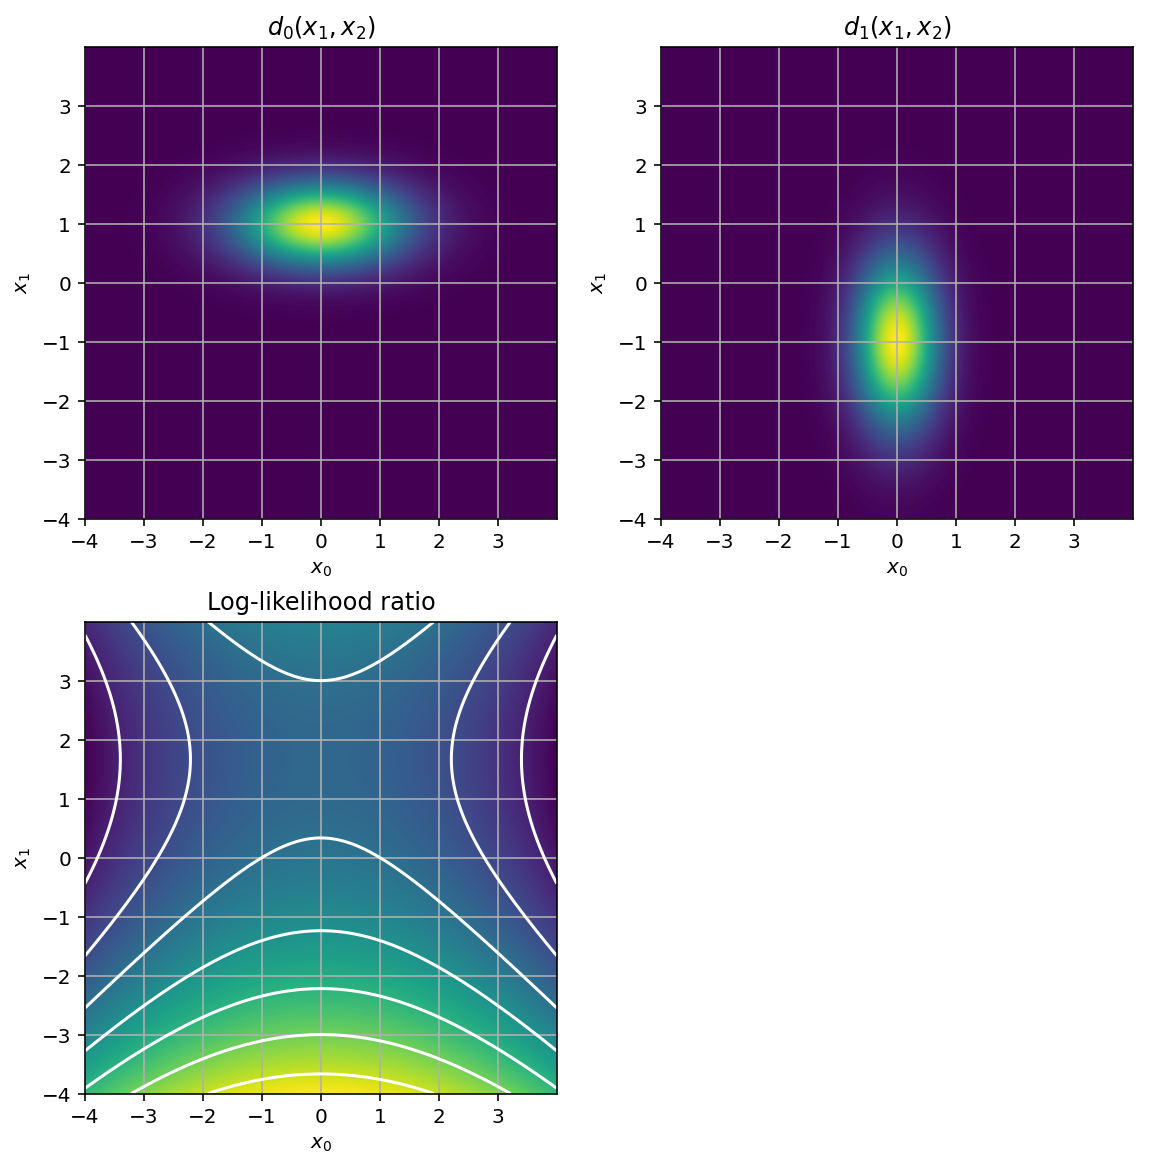

In [4]:
# State our means and standard deviations
mean = [[0,1], # Class 0 means for each feature
        [0,-1]] # Class 1 means for each feature
std = [[1, 0.5], # Class 0 stds for each feature
       [0.5, 1]] # Class 1 stds for each feature

# Create matrices to represent the feature space
x0 = np.linspace(-4,4,500)
x1 = np.linspace(-4,4,500)
X0, X1 = np.meshgrid(x0,x1)

plot_naive_bayes_example(X0,X1,mean,std)

We can see that constraining the variance across classes, even when they're allowed to vary across features, leads to linear decision boundaries while relaxing that constraint allows for nonlinear decision boundaries